In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

def toMach(u, T):
    return u / m.sqrt(373.1 * T)
    
u = []
p = []
T = []
ro = []
x = []
y = []
M = []
cap = 1.3
R = 287.0
p.append(14.8 * 101325)
T.append(1650)
u.append(m.sqrt(373.1 * T[0]))
M.append(1.01)
ro.append(p[0] / (R * T[0]))
file = open("wall_new.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        x.append(float(buf[0]))
        y.append(float(buf[1]))
for i in range(1,len(y)):
    #print(M[i - 1])
    buf = u[i - 1] * (1 - (y[i] - y[i -1]) / ((1 - M[i - 1] ** 2) * y[i - 1]))
    u.append(buf)
    #print("u  = ", buf)
    buf = p[i - 1] * (1 + cap * M[i - 1] ** 2 * (y[i] - y[i -1]) / ((1 - M[i - 1] ** 2) * y[i - 1]))
    p.append(buf)
    #print("p  = ", buf)
    buf = T[i - 1] * (1 + (cap - 1) * M[i - 1] ** 2 * (y[i] - y[i -1]) / ((1 - M[i - 1] ** 2) * y[i - 1]))
    #print("T  = ", buf)
    T.append(buf)
    buf = ro[i - 1] * (1 + M[i - 1] ** 2 * (y[i] - y[i -1]) / ((1 - M[i - 1] ** 2) * y[i - 1]))
    ro.append(buf)
    #print("ro  = ", buf)
    M.append(toMach(u[i], T[i]))
    

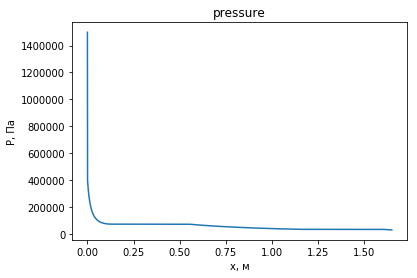

In [3]:
xnp = np.array(x)
plt.title('pressure')
plt.xlabel('x, м')
plt.ylabel('P, Па')
plt.plot(x, np.array(p))
plt.show()

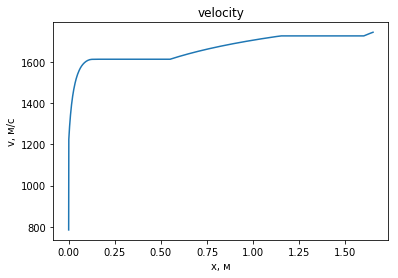

[-0.005319982, -0.005378838, -0.005440402, -0.005504799, -0.005571472, -0.005641202, -0.005713919, -0.005789516, -0.005868594, -0.005950681, -0.006036519, -0.006125811, -0.006219099, -0.00631622, -0.006417711, -0.006523455, -0.00663394, -0.006749311, -0.006869783, -0.006995611, -0.007126975, -0.007263824, -0.007406344, -0.007554639, -0.007708748, -0.007868686, -0.008034432, -0.008205922, -0.008383138, -0.008566204, -0.008755275, -0.008950512, -0.009151753, -0.009358944, -0.00957234, -0.009791504, -0.01001701, -0.010248433, -0.010485352, -0.010725614, -0.010968324, -0.011213257, -0.011460341, -0.011707273, -0.011954019, -0.012202734, -0.012452605, -0.012698067, -0.012937449, -0.01316984, -0.01339153, -0.013605189, -0.013811563, -0.014007217, -0.014189255, -0.014364128, -0.014522842, -0.014658188, -0.014776997, -0.014870444, -0.014928864, -0.014970509, -0.014979901, -0.014989725, -0.015, -0.014999999664724, -0.014999999664724, -0.014999999664724, -0.014999999664724, -0.014999999664724, -

In [11]:
plt.title('velocity')
plt.xlabel('x, м')
plt.ylabel('v, м/с')
plt.plot(x, np.array(u))
plt.show()
print(y)

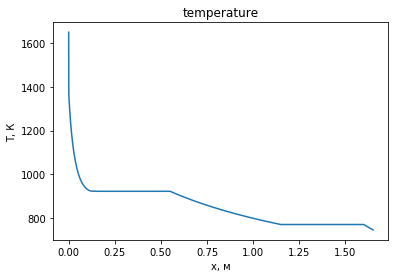

In [5]:
plt.title('temperature')
plt.plot(x, np.array(T))
plt.xlabel('x, м')
plt.ylabel('T, К')
plt.show()

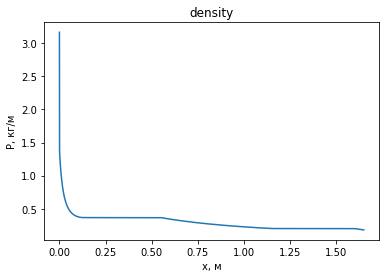

In [6]:
plt.title('density')
plt.plot(x, np.array(ro))
plt.xlabel('x, м')
plt.ylabel('P, кг/м')
plt.show()

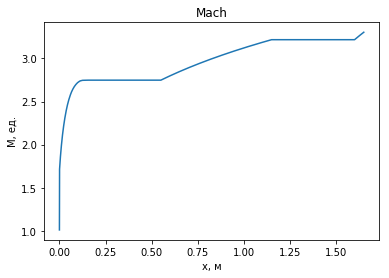

In [7]:
plt.title('Mach')
plt.plot(x, np.array(M))
plt.xlabel('x, м')
plt.ylabel('M, ед.')
plt.show()

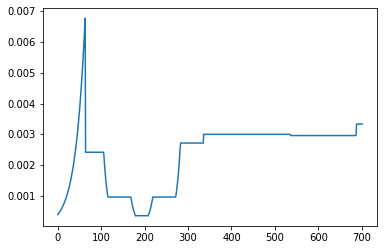

In [127]:
dx = []
for i in range(len(x) - 2):
    dx.append(x[i + 1] - x[i])
    
plt.plot(range(len(x) - 2), dx)
plt.show()